In [1]:
# ensure classes imported from .py files are dynamically updated
%load_ext autoreload
%autoreload 2

# plot matplots nicely
%matplotlib inline  

In [2]:
# import from pythin packages
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xesmf as xe

import cmocean

from datetime import datetime, date, timedelta

# import from pre-built data classes
from data_handler import *
from steric_height import StericHeight
from plotting_fns import PlottingFns as Pfns
from region import Region
from utils import Utils as utls

pfns = Pfns()

In [3]:
# load dynamic ocean topography data from class
dot = DOT().ds.dot
bha = GRACE(from_file=False).ds.lwe_thickness

# set up stweric height
sha = StericHeight(ssh_ref='DOT',
                   ssh=dot,
                   lwe=bha,
                   msl=ERA5().ds.msl
                  ).get_sha()

/nfs/b0133/eejco/miniconda3/envs/sha-env/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
sha.sha

<xarray.DataArray 'sha' (time: 196, latitude: 64, longitude: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.81137419, -0.74465512, -0.82344299, ..., -1.17415644,
         -0.58001868, -0.45944772],
        [-0.42003846, -0.1541578 , -0.20123931, ..., -0.96838714,
         -0.66448082, -0.28771549],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 4.38512115,  4.21283347,  4.59057267, ...,  5.4903796 ,
          5.54041438,  5.09357841],
        [ 4.0678498 ,  3.76535646,  4.53227221, ...,  4.81727978,
          5.04431591,  4.58486742],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 1.77931908,  2.22014413,  3.32847713, ...,  3.23487013,
          2.82317624,  2.3364421 ],
        [ 1.95941292,  2.2005915 ,  3.63205993, ...,  2.9631131 ,
          2.75989259,  2.28798158],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -81.75 -81.25 -80.75 ... -51.25 -50.75 -50.25
  * time       (time) datetime64[ns] 2002-07-01 2002-08-01 ... 2018-10-01
Attributes:
    description:  steric height (sh) = ssh - eha

In [15]:
gad = xr.open_dataarray('../data/PROCESSED/GRACE_GAD.nc')
sha_gad = StericHeight(ssh_ref='DOT',
                   ssh=dot,
                   lwe=gad,
                   msl=ERA5().ds.msl
                  ).get_sha()

In [17]:
gmg = sha.eha - sha_gad.eha

In [18]:
climatology = lambda da: da.groupby('time.month').mean('time',skipna=True)
get_season = lambda da, months: climatology(da).sel(month=months).mean('month')

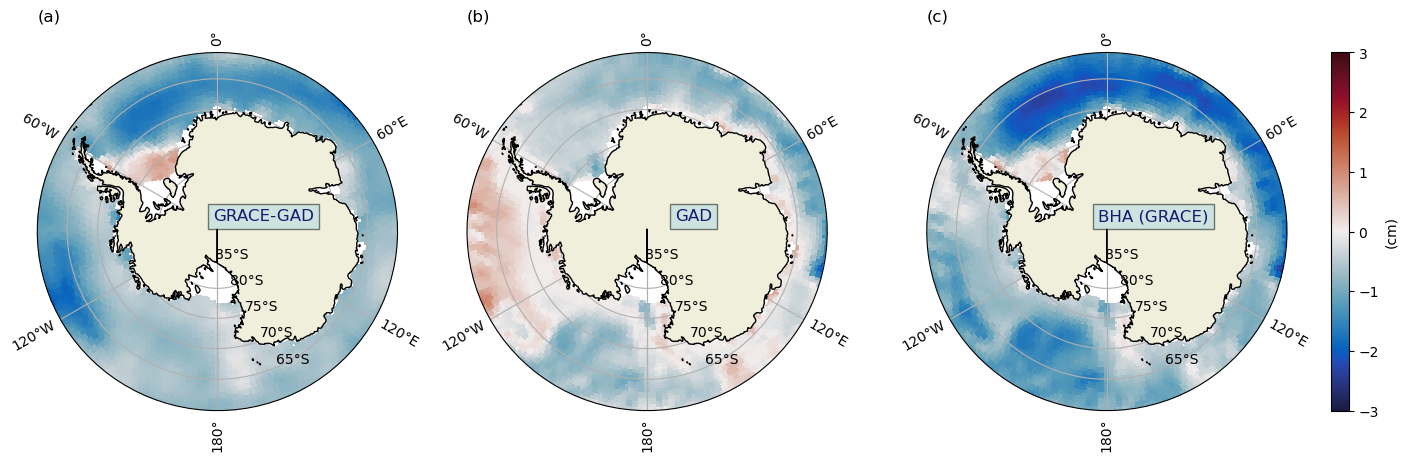

In [36]:
fig,axs = plt.subplots(1,3,figsize=(14,4.5),subplot_kw={'projection':ccrs.SouthPolarStereo()},constrained_layout=True)

ax=axs.flat
im1 = pfns.sp(ax[0],get_season(gmg,[4,5,6]),vmax=3,vmin=-3,cmap=cmocean.cm.balance,sea='Small Southern Ocean',land_zorder=3)
pfns.sp(ax[1],get_season(sha_gad.eha,[4,5,6]),vmax=3,vmin=-3,cmap=cmocean.cm.balance,sea='Small Southern Ocean',land_zorder=3)
pfns.sp(ax[2],get_season(sha.eha,[4,5,6]),vmax=3,vmin=-3,cmap=cmocean.cm.balance,sea='Small Southern Ocean',land_zorder=3)
axs[0].text(80,-82,'GRACE-GAD',transform=ccrs.PlateCarree(),size=12,c='midnightblue',ha='center',bbox=dict(boxstyle="square",facecolor='lightblue',alpha=0.5))
axs[1].text(80,-82,'GAD',transform=ccrs.PlateCarree(),size=12,c='midnightblue',ha='center',bbox=dict(boxstyle="square",facecolor='lightblue',alpha=0.5))
axs[2].text(80,-82,'BHA (GRACE)',transform=ccrs.PlateCarree(),size=12,c='midnightblue',ha='center',bbox=dict(boxstyle="square",facecolor='lightblue',alpha=0.5))
cbar1 = fig.colorbar(im1, ax=axs[2])# shrink=0.8)
cbar1.set_label('(cm)')

ax[0].set_title('(a)',loc='left')
ax[1].set_title('(b)',loc='left')
ax[2].set_title('(c)',loc='left')

fig.savefig('plots/figureS7.png',dpi=200,transparent=False,bbox_inches='tight')

In [37]:
bha_trimmed = bha.sel(time=slice(sha.time[0],sha.time[-1]))
bha_anomaly = bha_trimmed - bha_trimmed.mean('time')

In [38]:
bha

<xarray.DataArray 'lwe_thickness' (time: 242, latitude: 113, longitude: 1440)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.6806612 , -1.6806612 , -1.6806612 , ..., -1.4294599 ,
         -1.4294599 , -1.4294599 ],
        [-1.5881468 , -1.5881468 , -1.6806612 , ..., -1.4294599 ,
         -1.5881468 , -1.5881468 ],
        [-1.5881468 , -1.5881468 , -1.5881468 , ..., -1.5881468 ,
         -1.5881468 , -1.5881468 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.7884874 , -0.7884874 , -0.7884874 , ..., -0.45690817,
         -0.45690817, -0.45690817],
        [ 1.0315456 ,  1.0315456 , -0.7884874 , ..., -0.45690817,
          1.0315456 ,  1.0315456 ],
        [ 1.0315456 ,  1.0315456 ,  1.0315456 , ...,  1.0315456 ,
          1.0315456 ,  1.0315456 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.357316  , -1.357316  , -1.357316  , ..., -1.1414196 ,
         -1.1414196 , -1.1414196 ],
        [ 0.7093603 ,  0.7093603 , -1.357316  , ..., -1.1414196 ,
          0.7093603 ,  0.7093603 ],
        [ 0.7093603 ,  0.7093603 ,  0.7093603 , ...,  0.7093603 ,
          0.7093603 ,  0.7093603 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -78.38 -78.12 -77.88 ... -50.88 -50.62 -50.38
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2022-05-01
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

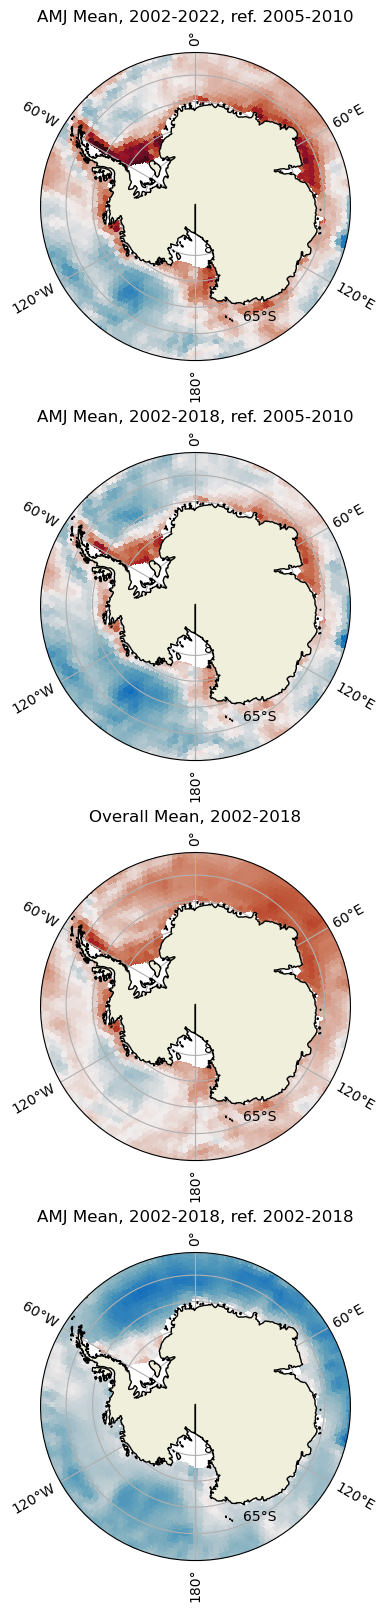

In [40]:
fig,axs = plt.subplots(4,1,figsize=(5,16),subplot_kw={'projection':ccrs.SouthPolarStereo()}, constrained_layout=True)

ax=axs.flat
pfns.sp(ax[0],get_season(bha,[4,5,6]),vmax=4,vmin=-4,title='AMJ Mean, 2002-2022, ref. 2005-2010',cmap=cmocean.cm.balance,sea='Small Southern Ocean')
pfns.sp(ax[1],get_season(bha_trimmed,[4,5,6]),vmax=4,vmin=-4,title='AMJ Mean, 2002-2018, ref. 2005-2010',cmap=cmocean.cm.balance,sea='Small Southern Ocean')
pfns.sp(ax[2],bha_trimmed.mean('time'),vmax=4,vmin=-4,title='Overall Mean, 2002-2018',cmap=cmocean.cm.balance,sea='Small Southern Ocean')
pfns.sp(ax[3],get_season(sha.eha,[4,5,6]),vmax=4,vmin=-4,title='AMJ Mean, 2002-2018, ref. 2002-2018',cmap=cmocean.cm.balance,sea='Small Southern Ocean')